# Customer Churn Analysis

## 1.Dataset loading

In [21]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [22]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

In [23]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### About columns

description of each feature inside the data.

CustomerId – Customer ID

Gender – Male or Female customerSeniorCitizen – Whether the customer is a senior citizen or not (1, 0)

SeniorCitizen - Whether the customer has a SeniorCitizen  or not (Yes, No)

Partner – Whether the customer has a partner or not (Yes, No)

Dependents – Whether the customer has dependents or not (Yes, No)

Tenure – Number of months the customer has stayed with the company

PhoneService – Whether the customer has a phone service or not (Yes, No)

MultipleLines – Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService – Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity – Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup – Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection – Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport – Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTv – Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies – Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract – The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling – Whether the customer has paperless billing or not (Yes, No)

PaymentMethod – The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic),
Credit card (automatic))

MonthlyCharges – The monthly charge amount

TotalCharges – The total amount charged to the customer

Churn – Whether the customer churned or not (Yes or No). 

In [24]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 2.Checking basic details

In [26]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Inference:  there is  null values

In [27]:
df.shape

(7043, 21)

In [28]:
df = df.drop('customerID', axis = 1)

In [29]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [30]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## 3.EDA

In [31]:
for i in df.columns:
  print(df[i].value_counts())
  print("-------------------------------")

Male      3555
Female    3488
Name: gender, dtype: int64
-------------------------------
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
-------------------------------
No     3641
Yes    3402
Name: Partner, dtype: int64
-------------------------------
No     4933
Yes    2110
Name: Dependents, dtype: int64
-------------------------------
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
-------------------------------
Yes    6361
No      682
Name: PhoneService, dtype: int64
-------------------------------
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
-------------------------------
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
-------------------------------
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: in

<AxesSubplot:xlabel='Churn', ylabel='count'>

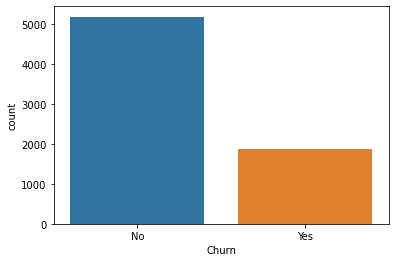

In [32]:
sns.countplot(x ='Churn',data = df)

<AxesSubplot:xlabel='gender', ylabel='count'>

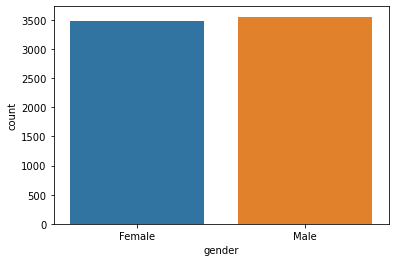

In [33]:
sns.countplot(x ='gender',data = df)

In [34]:
for i in df.columns:
  my_crosstab = pd.crosstab(index=df["Churn"],columns=df[i],margins=True)
  print(my_crosstab)
  print("___________________________________________________________")

gender  Female  Male   All
Churn                     
No        2549  2625  5174
Yes        939   930  1869
All       3488  3555  7043
___________________________________________________________
SeniorCitizen     0     1   All
Churn                          
No             4508   666  5174
Yes            1393   476  1869
All            5901  1142  7043
___________________________________________________________
Partner    No   Yes   All
Churn                    
No       2441  2733  5174
Yes      1200   669  1869
All      3641  3402  7043
___________________________________________________________
Dependents    No   Yes   All
Churn                       
No          3390  1784  5174
Yes         1543   326  1869
All         4933  2110  7043
___________________________________________________________
tenure   0    1    2    3    4    5    6    7    8    9  ...  64  65  66  67  \
Churn                                                    ...                   
No      11  233  115  106   93

In [35]:
df_cont=df[['tenure','MonthlyCharges', 'TotalCharges']]
df_cata=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'Churn']]

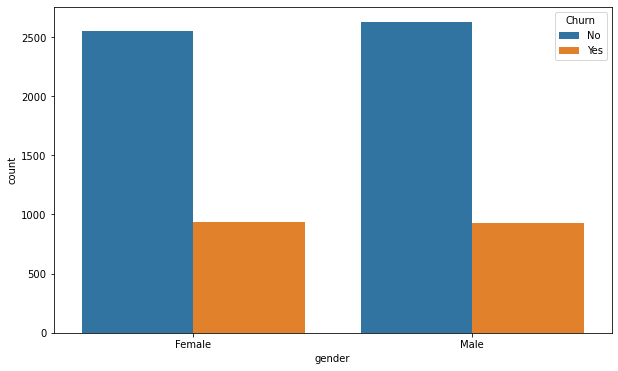

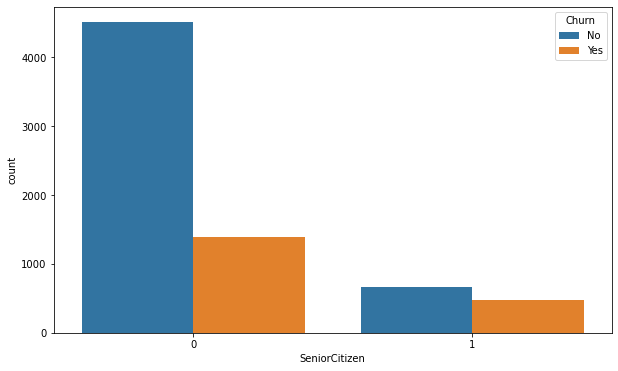

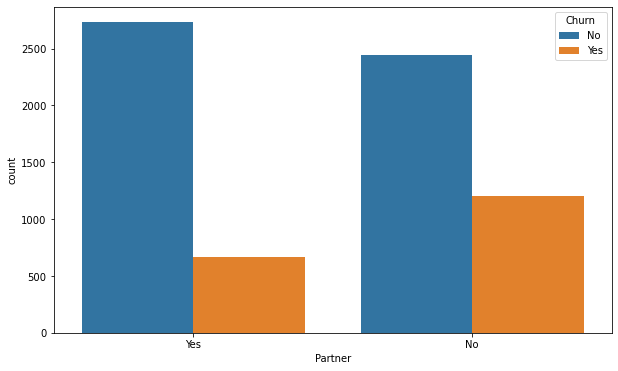

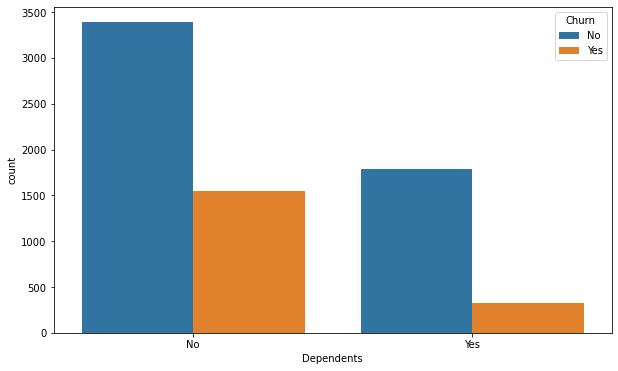

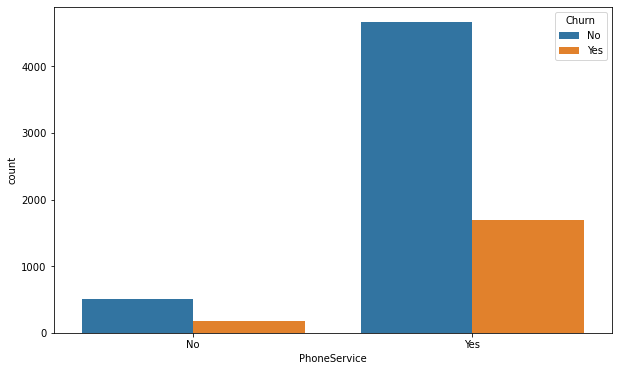

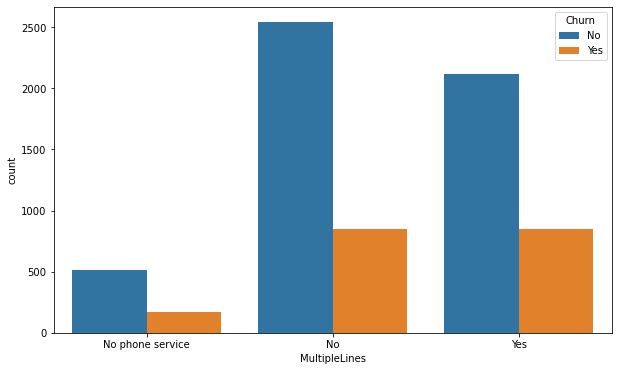

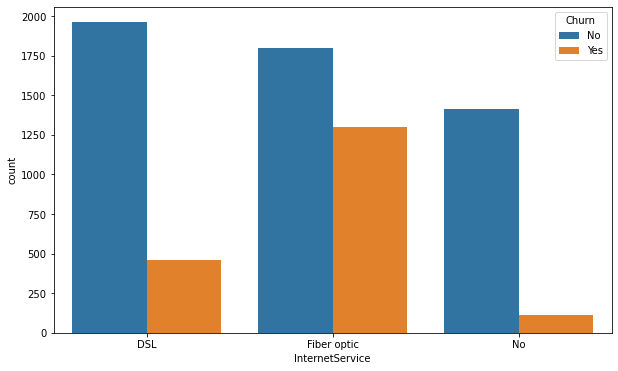

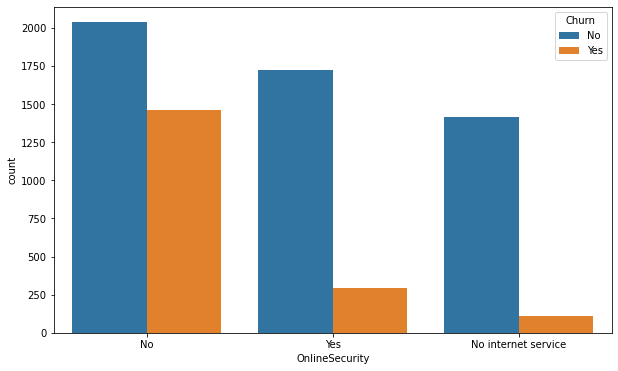

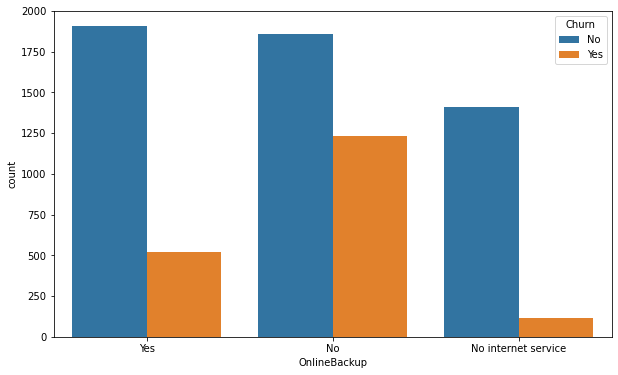

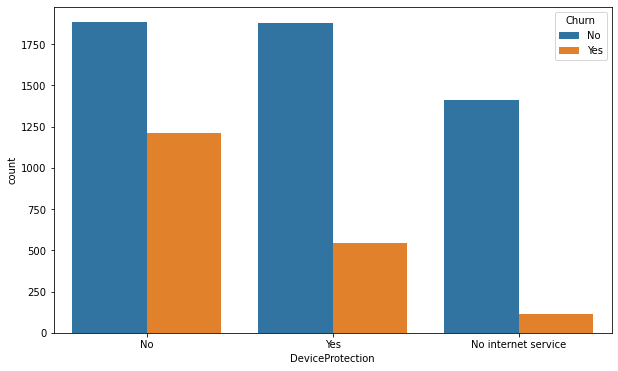

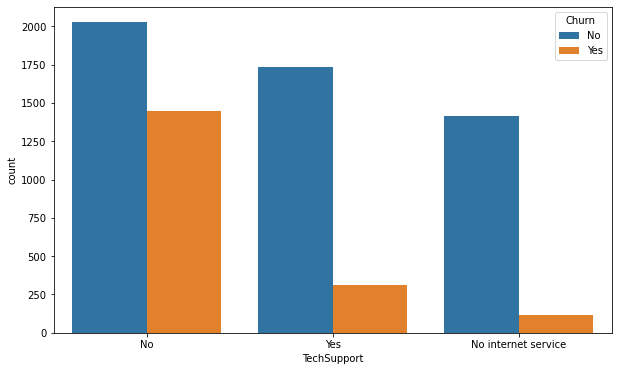

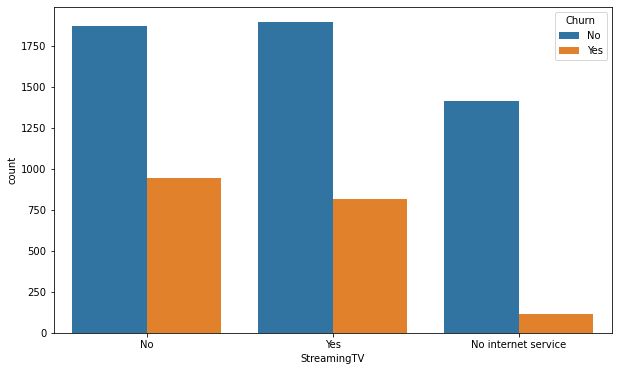

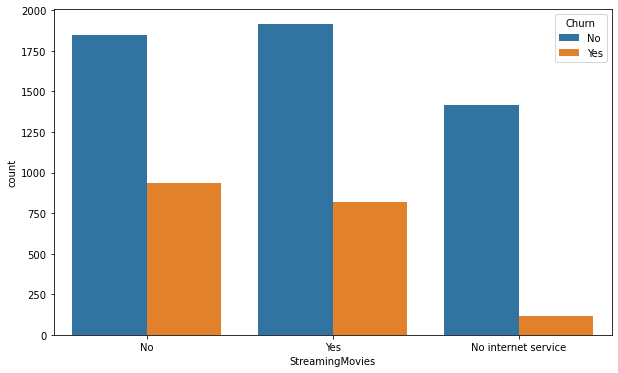

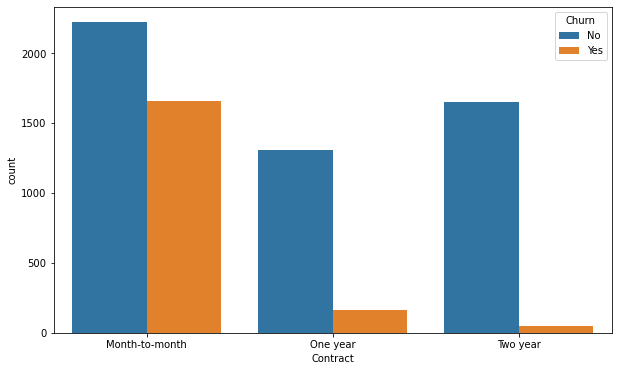

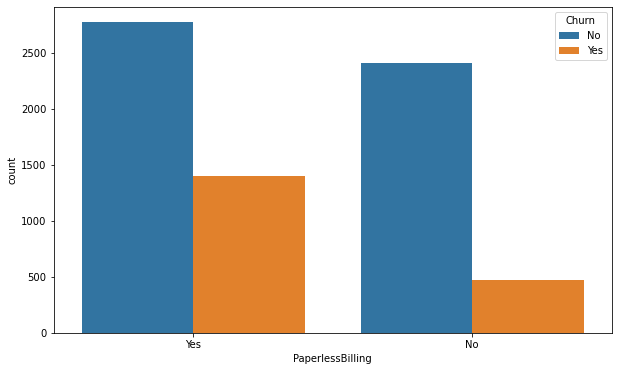

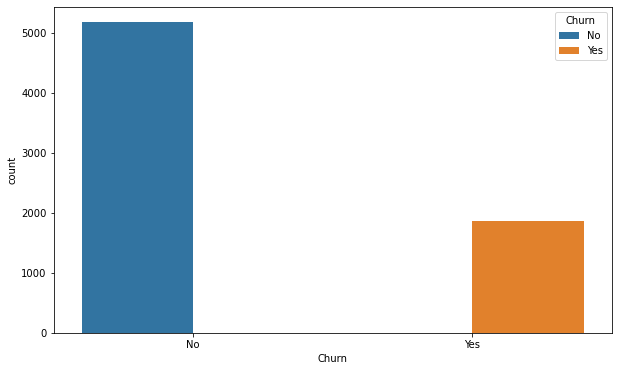

In [36]:
for i in df_cata.columns:
  plt.figure(figsize=[10,6])
  sns.countplot(x=df_cata[i],data=df_cata,hue='Churn')

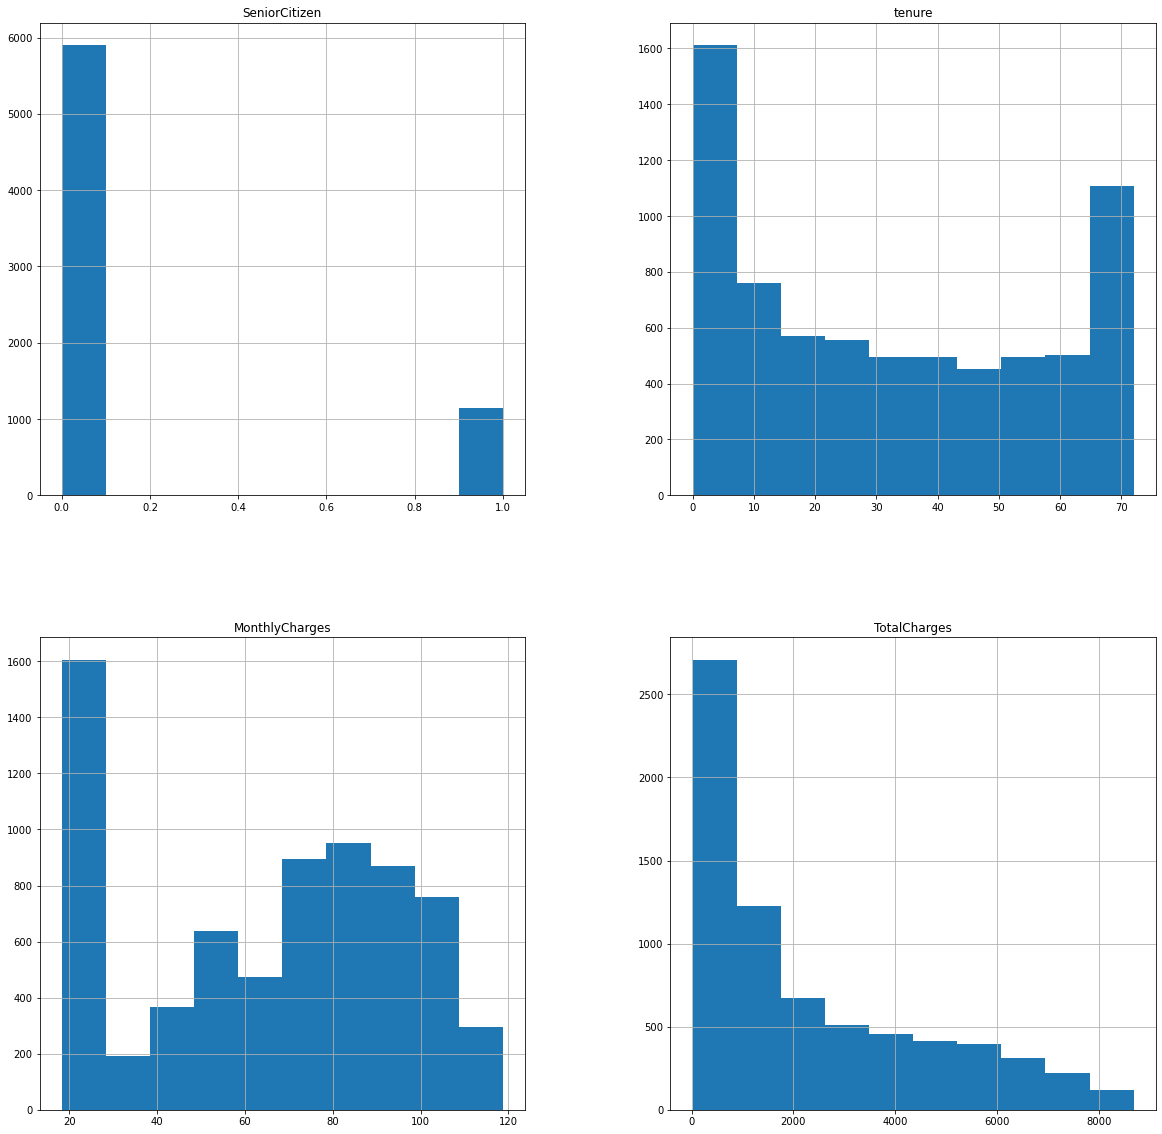

In [37]:
df.hist(figsize=(20, 20));

## Correlation

In [38]:
df_corr=df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

<AxesSubplot:>

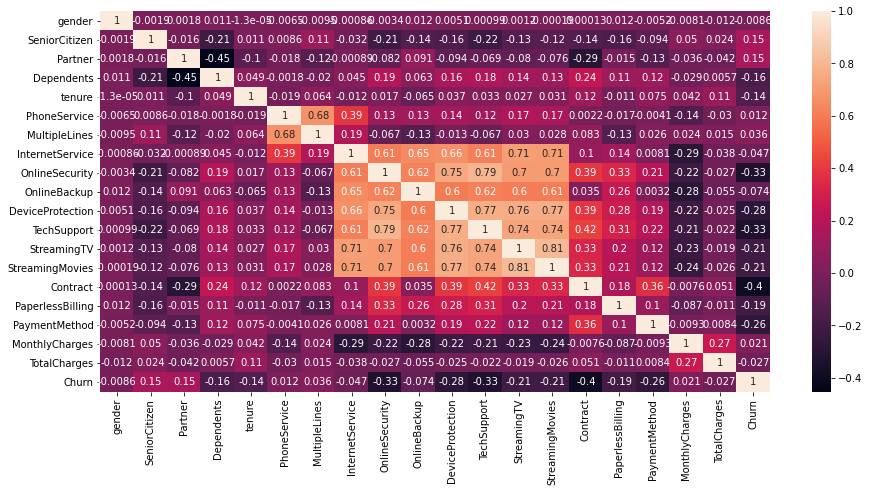

In [39]:
plt.figure(figsize=[15,7])
sns.heatmap(df_corr,annot=True)


Outcome of correlation
From heatmap partner dataset has positive correlation .

1.rank has 52 percent correlation with target column which can be considered as a good bond.

2.discipline has 16 percent correlation with target column which can be considered as a good bond.

3.years since the professor has obtained their PhD has 42 percent correlation with target column which can be

considered as a good bond.

4.years the professor has served the department and/or universityhas 33 percent correlation with target column which can be

considered as a good bond.

5.professor’s sex of either male or female has 14 percent correlation with target column which can be considered as a good bond.

max correlation :rank

min correlation: sex

## 4. Data pre-processing

### Null Value removal

In [41]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [42]:
df['TotalCharges'].fillna(df['TotalCharges'].mode()[0], inplace=True)

### Encoding

In [43]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [44]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
df["gender"] = LabelEncoder().fit_transform(df['gender'])
df["Partner"] = LabelEncoder().fit_transform(df['Partner'])
df['Dependents'] = LabelEncoder().fit_transform(df['Dependents'])
df["PhoneService"] = LabelEncoder().fit_transform(df['PhoneService'])
df["MultipleLines"] = LabelEncoder().fit_transform(df['MultipleLines'])
df['OnlineSecurity'] = LabelEncoder().fit_transform(df['OnlineSecurity'])
df["DeviceProtection"] = LabelEncoder().fit_transform(df["DeviceProtection"])
df['StreamingTV'] = LabelEncoder().fit_transform(df['StreamingTV'])
df['InternetService'] = LabelEncoder().fit_transform(df['InternetService'])
df['PaperlessBilling'] = LabelEncoder().fit_transform(df['PaperlessBilling'])
df["OnlineBackup"] = LabelEncoder().fit_transform(df["OnlineBackup"])
df['StreamingMovies'] = LabelEncoder().fit_transform(df['StreamingMovies'])
df['Contract'] = LabelEncoder().fit_transform(df["Contract"])
df["TechSupport"] = LabelEncoder().fit_transform(df["TechSupport"])
df["PaymentMethod"] = LabelEncoder().fit_transform(df["PaymentMethod"])

In [45]:
df['Churn']=LE.fit_transform(df['Churn'])

In [46]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


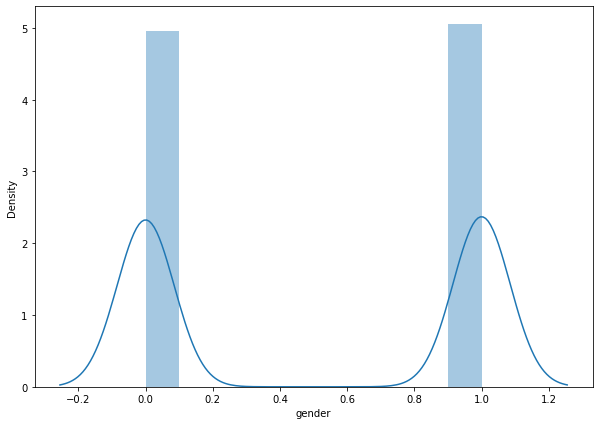

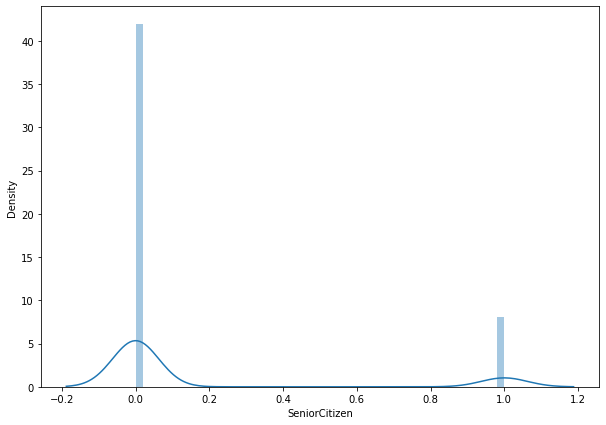

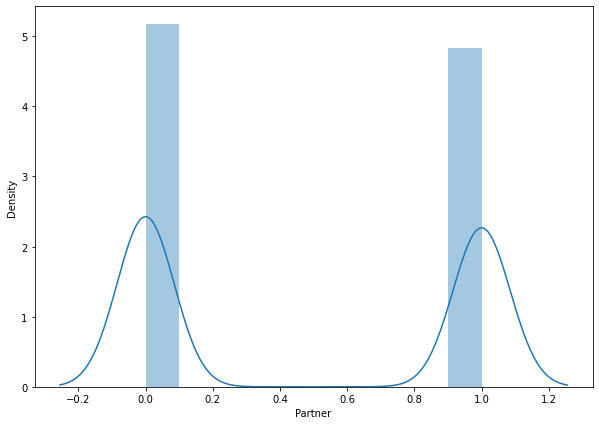

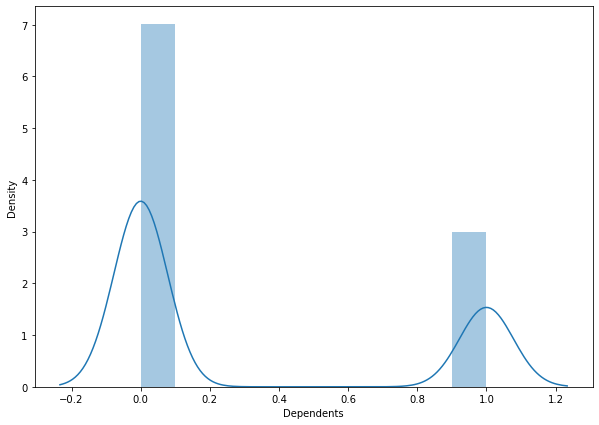

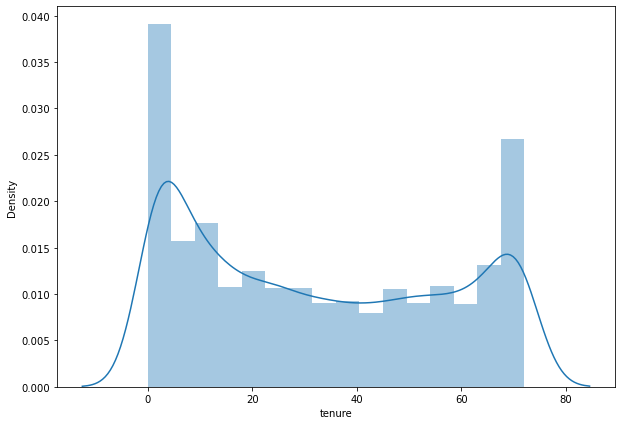

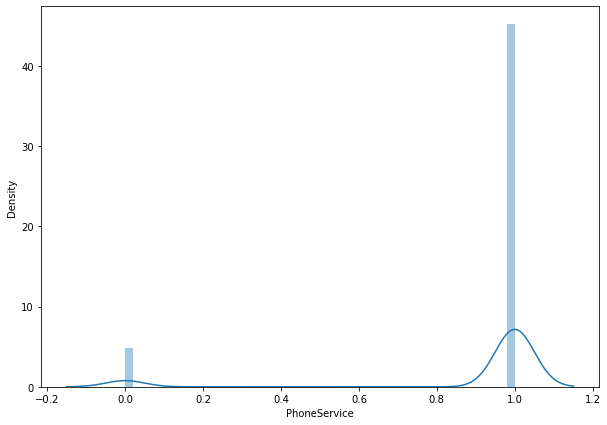

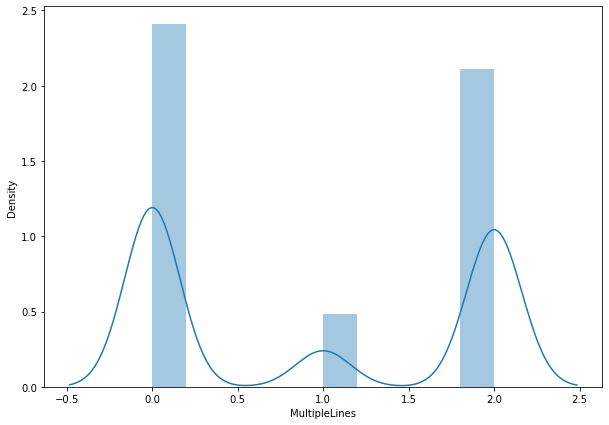

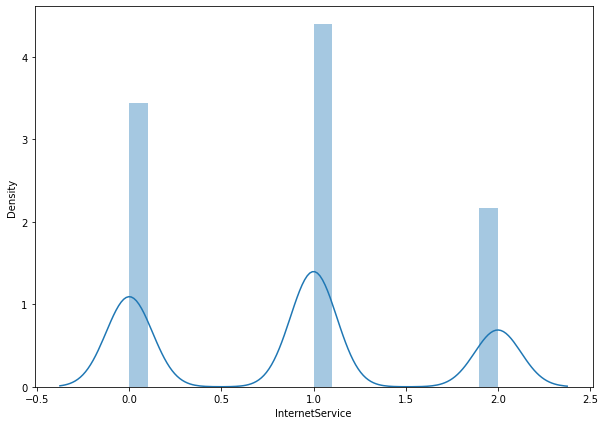

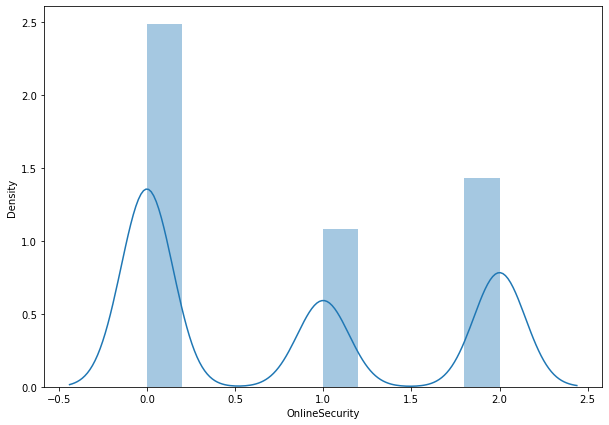

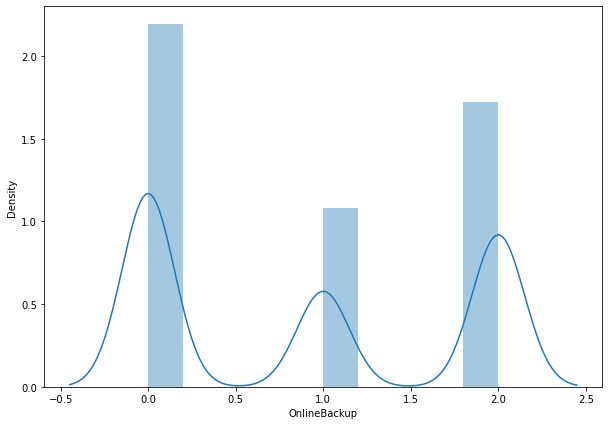

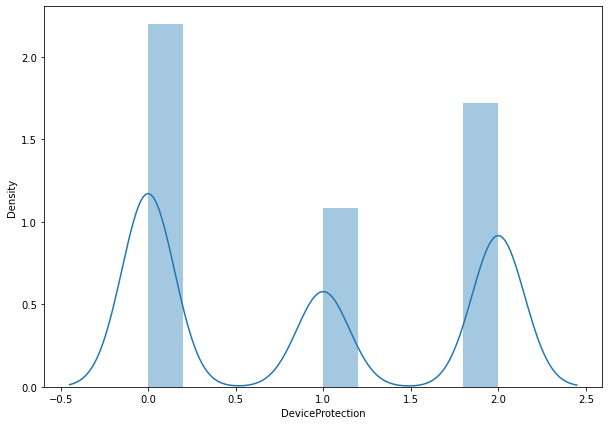

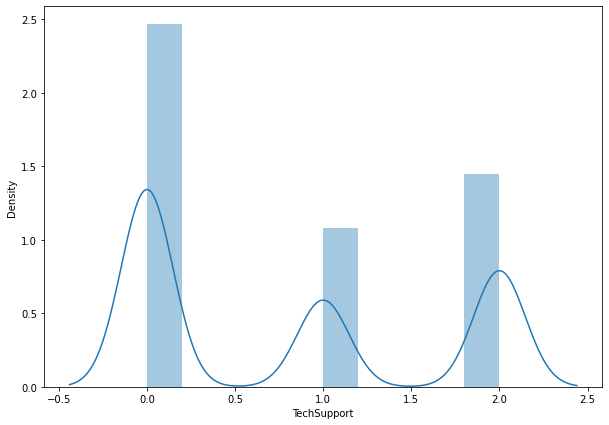

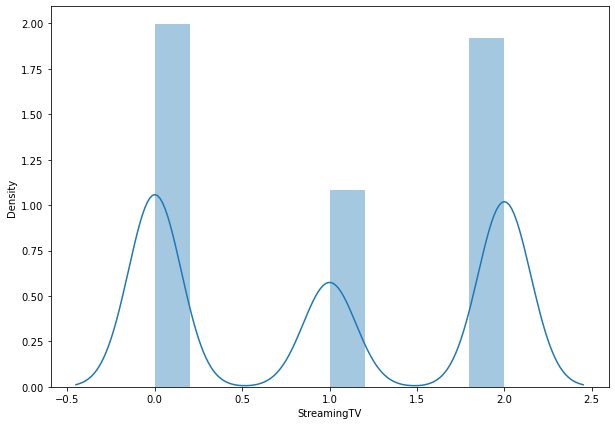

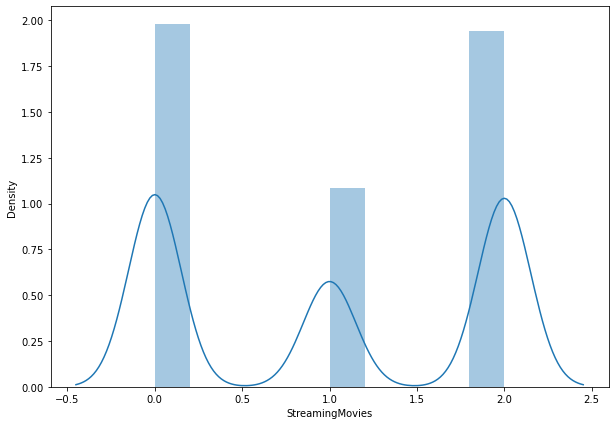

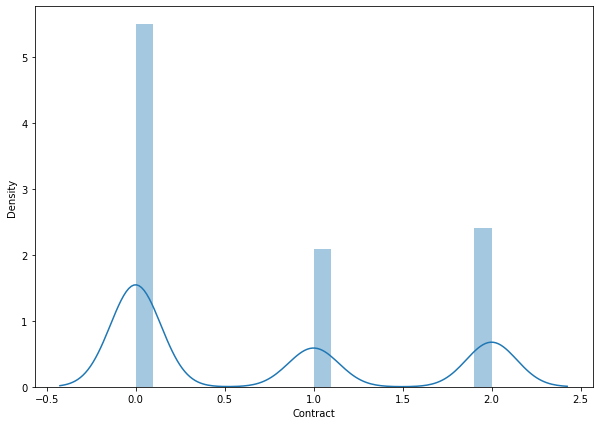

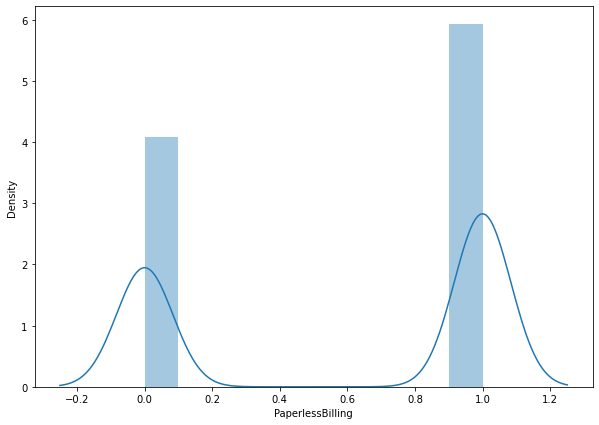

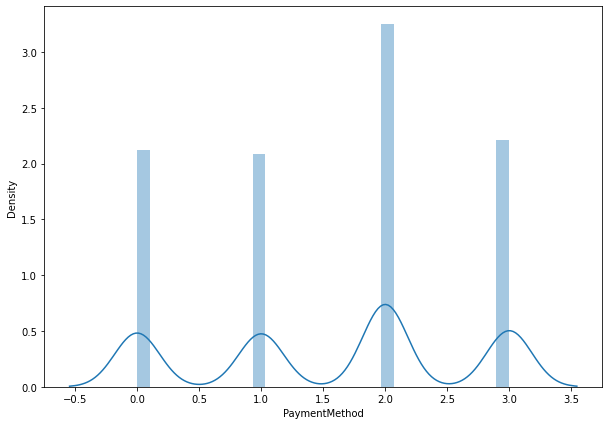

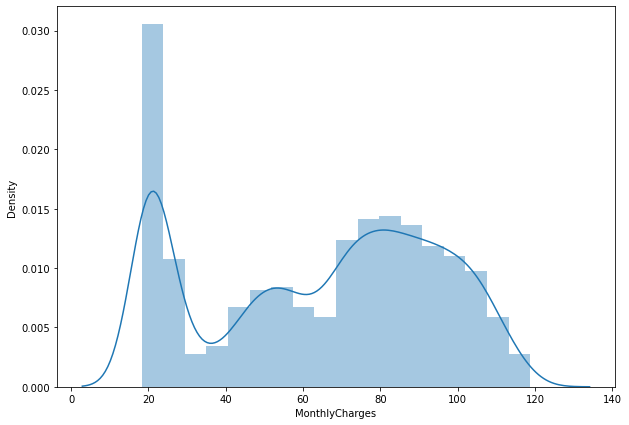

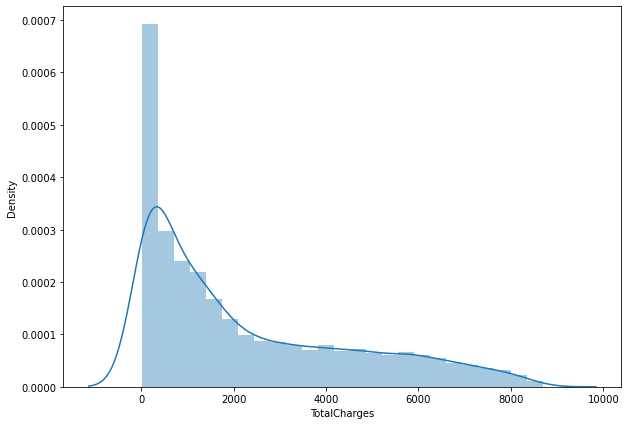

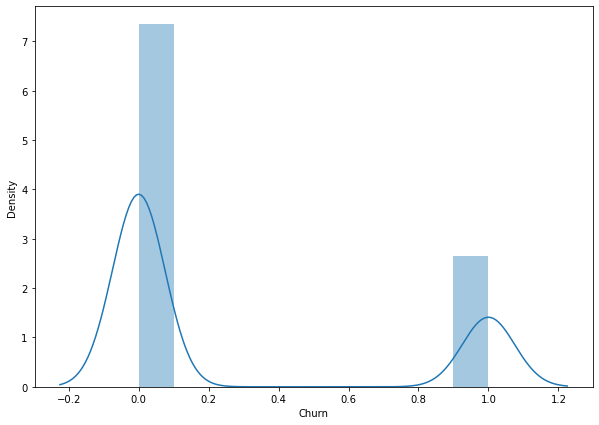

In [47]:
for i in df.columns:
    plt.figure(figsize = (10, 7))
    sns.distplot(df[i])

### Removing outliers

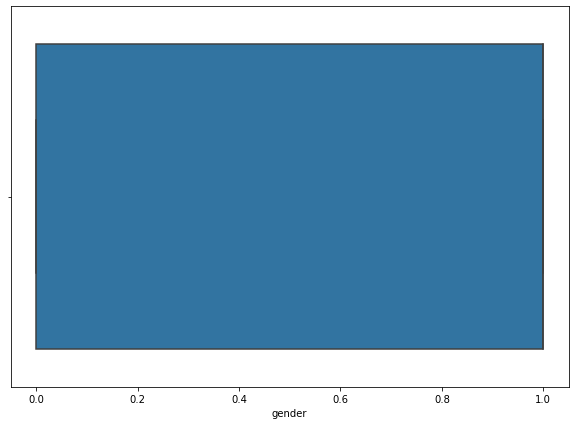

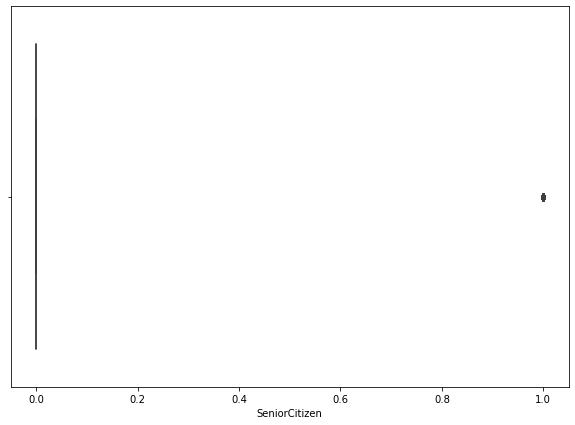

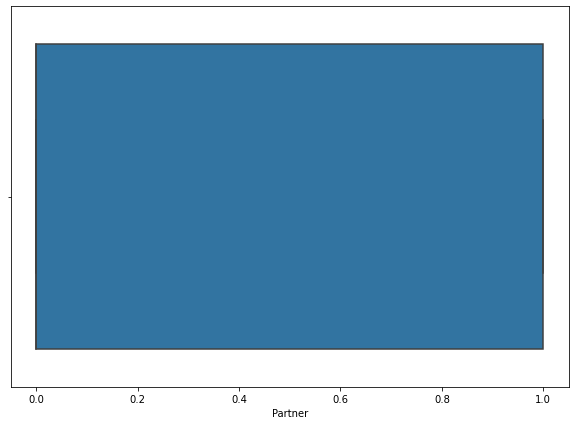

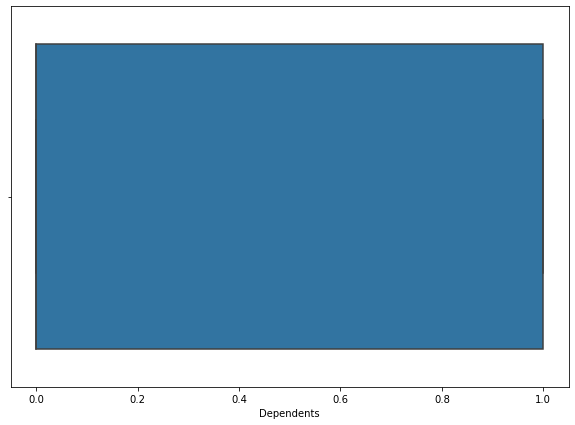

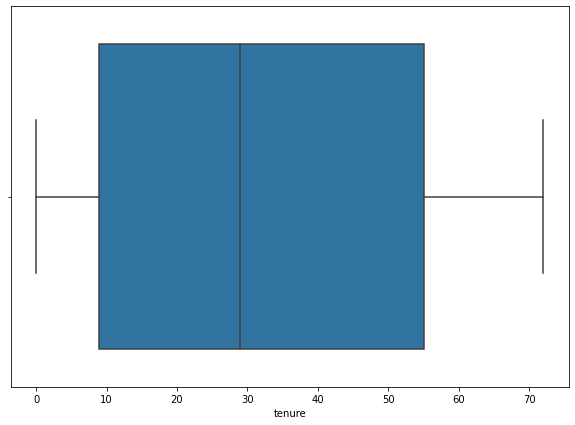

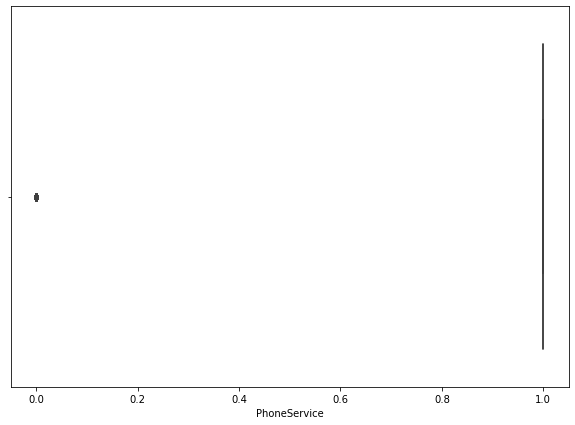

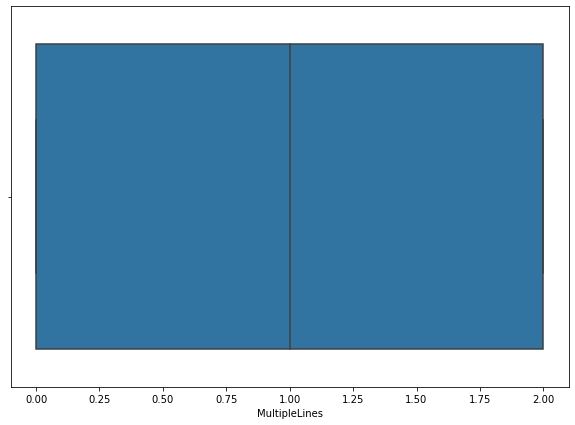

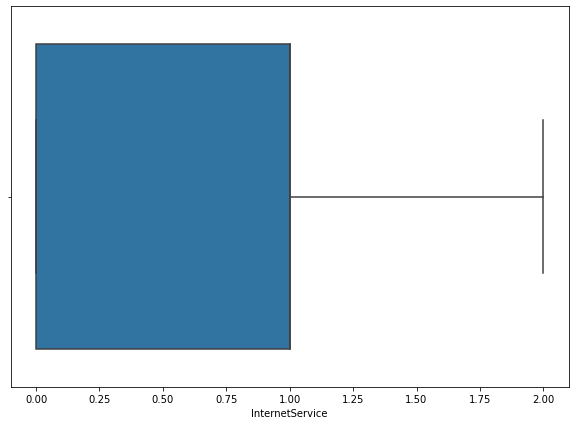

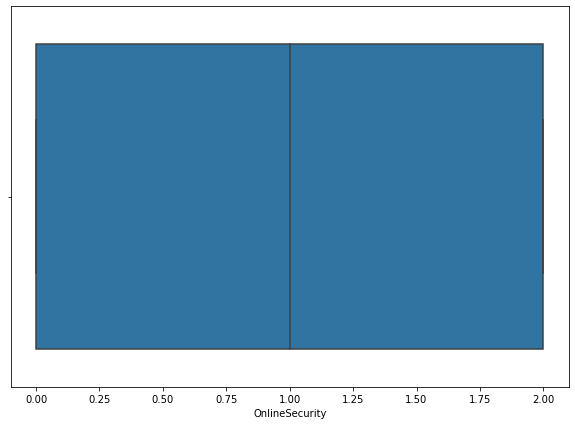

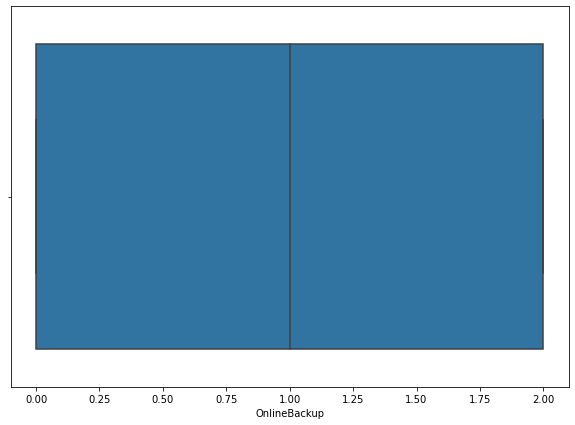

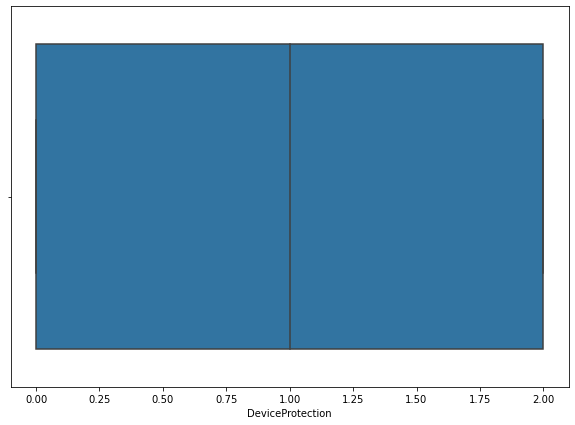

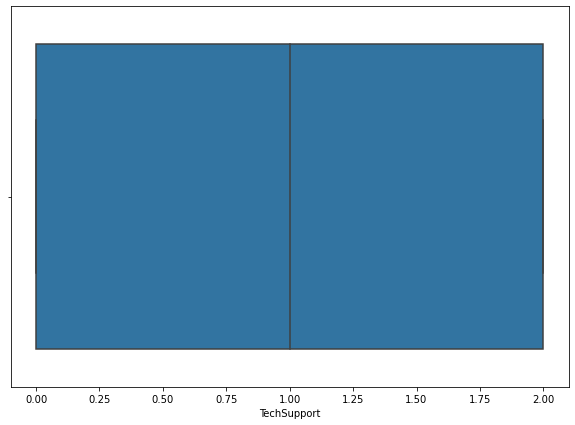

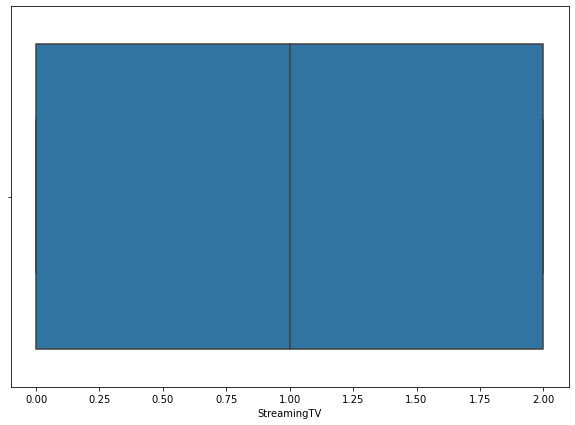

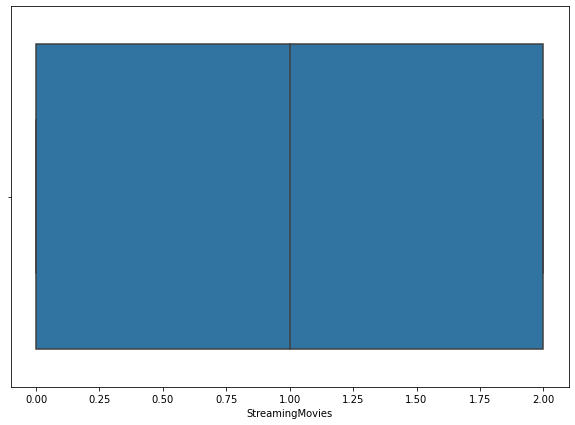

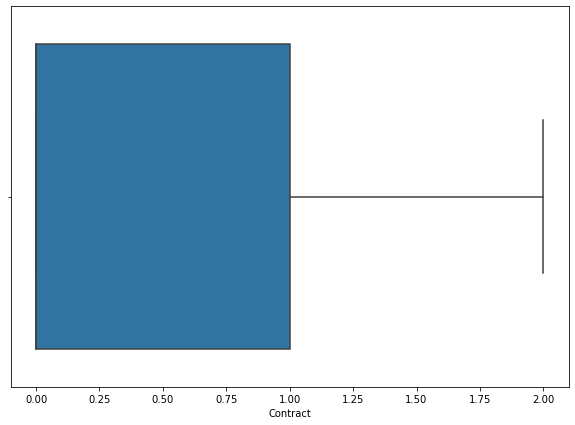

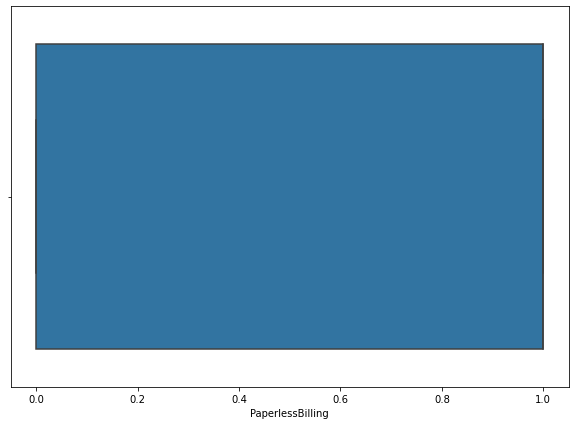

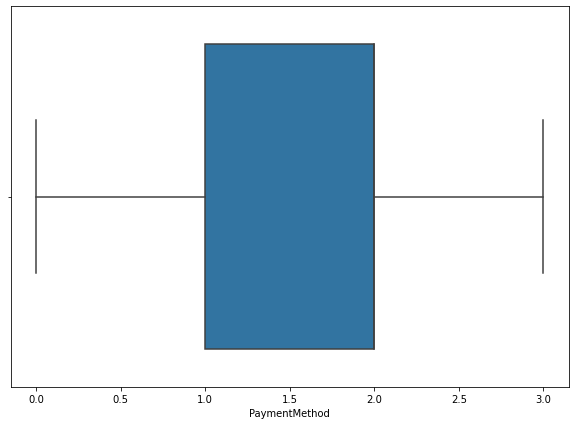

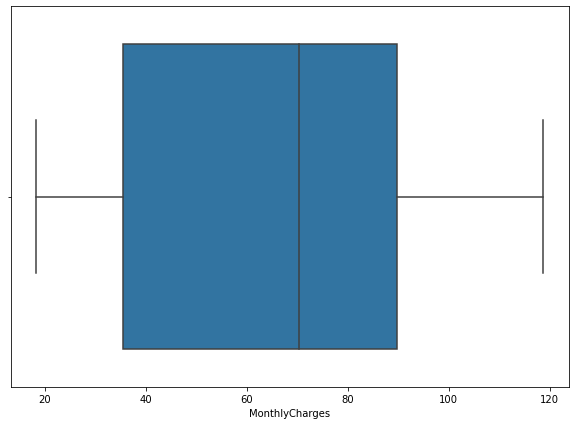

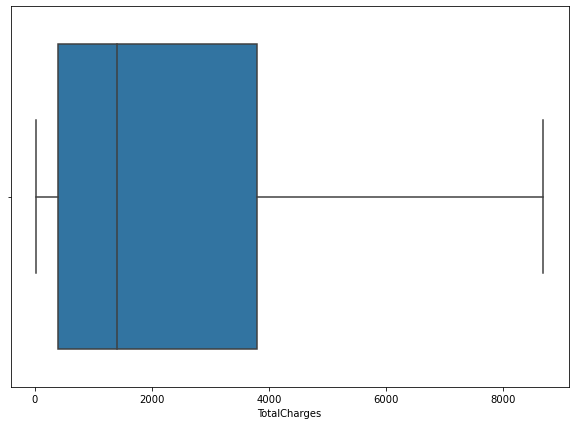

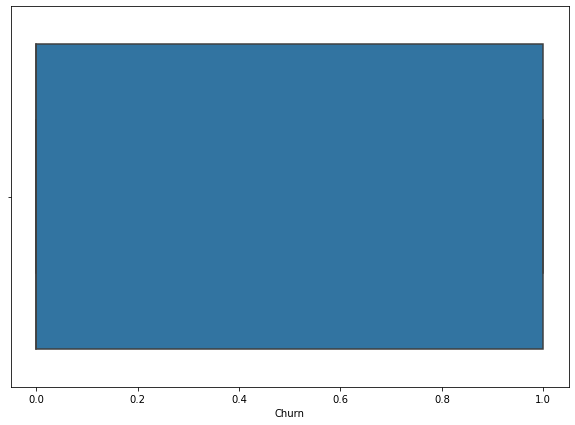

In [48]:
for i in df.columns:
    plt.figure(figsize = (10, 7))
    sns.boxplot(df[i])
    

#### Z Score _ Technique

In [49]:
from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(df))
z.shape

(7043, 20)

In [50]:
threshold=3
print(np.where(z>3))

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1

In [51]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(7043, 20)
(6361, 20)


In [52]:
loss_percent=(7043-6361)/7043*100
print(loss_percent)

9.683373562402386


#### Z score is removing 9.6% data  so this method is not suggested.

### Removing skewness

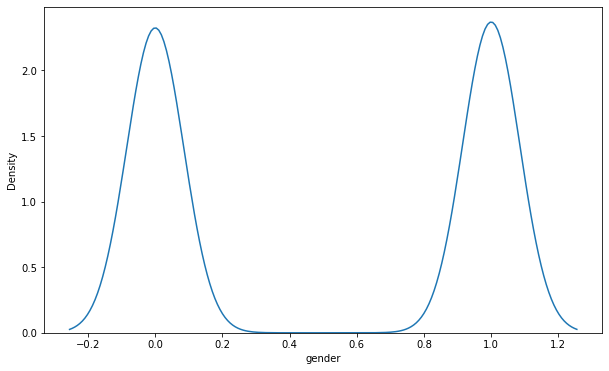

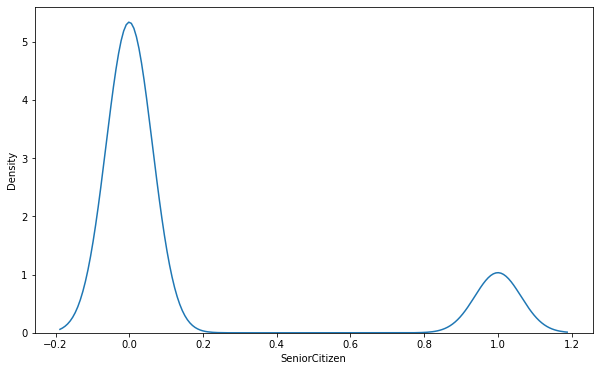

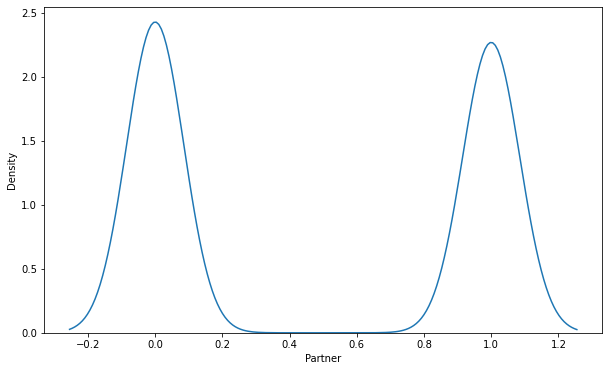

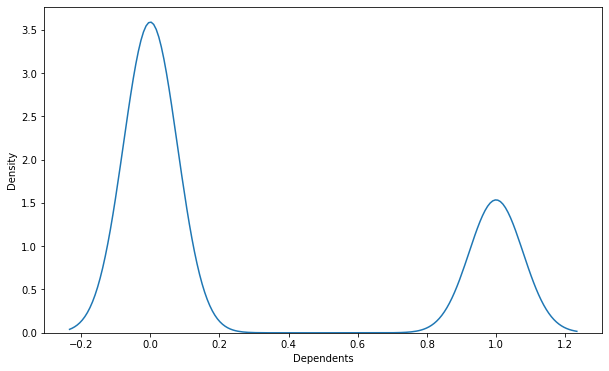

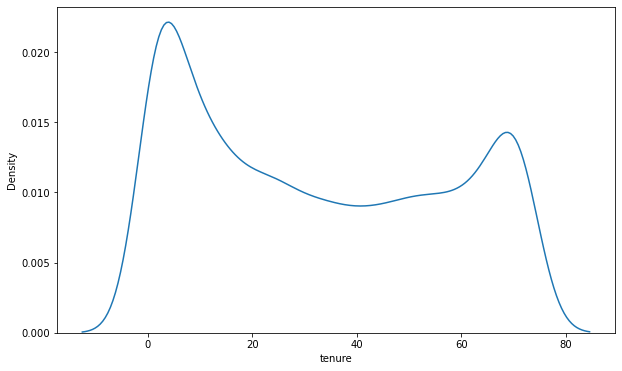

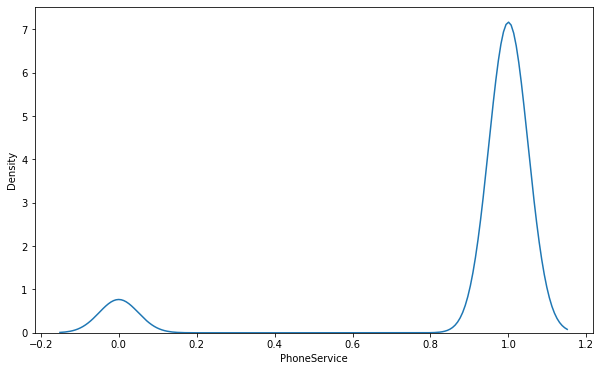

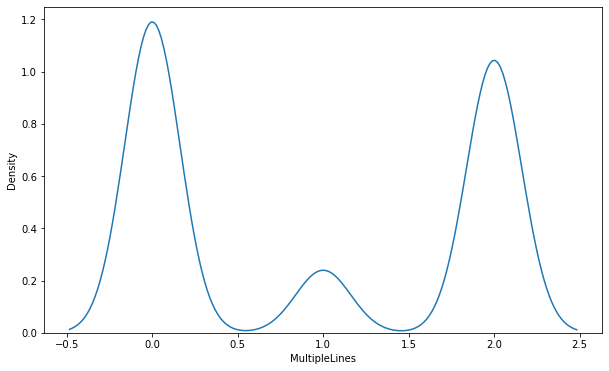

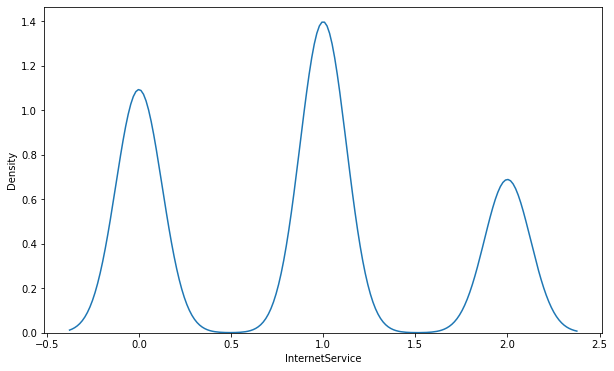

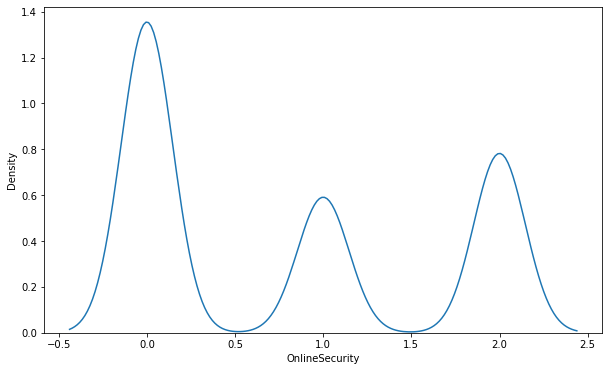

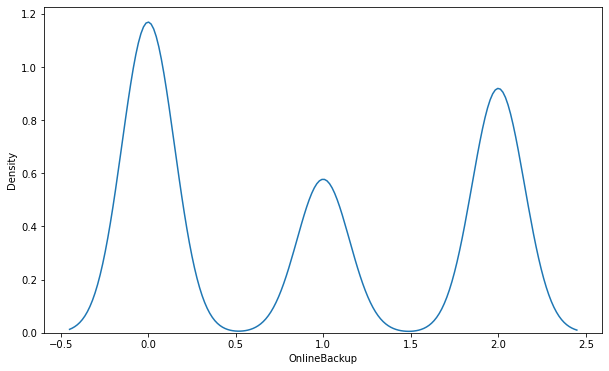

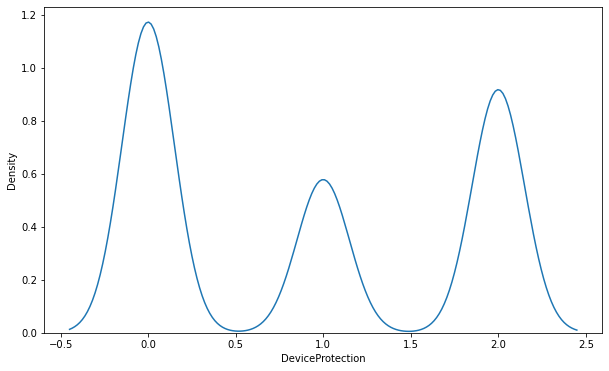

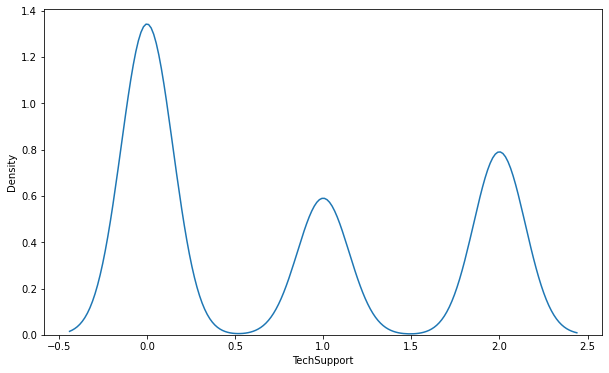

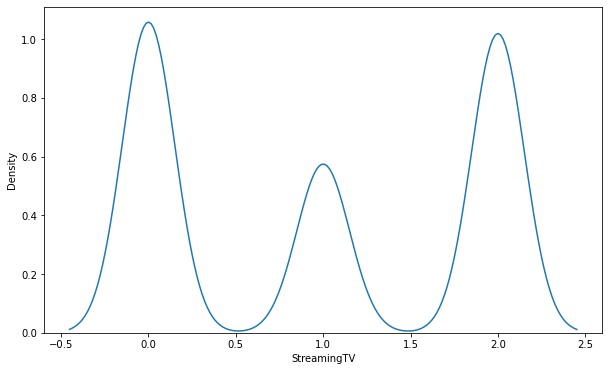

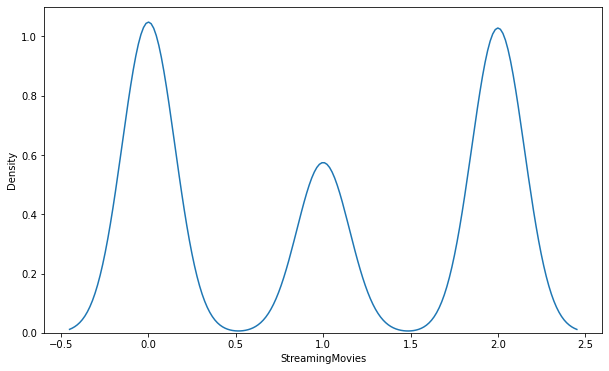

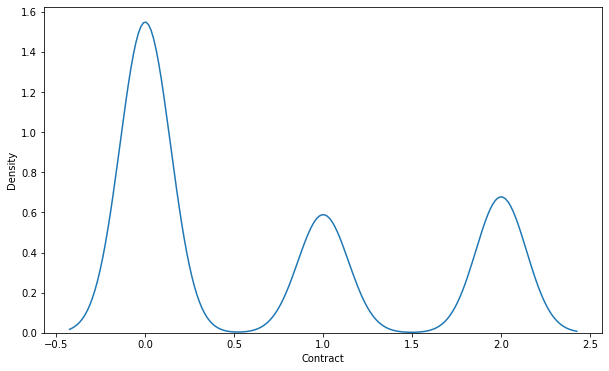

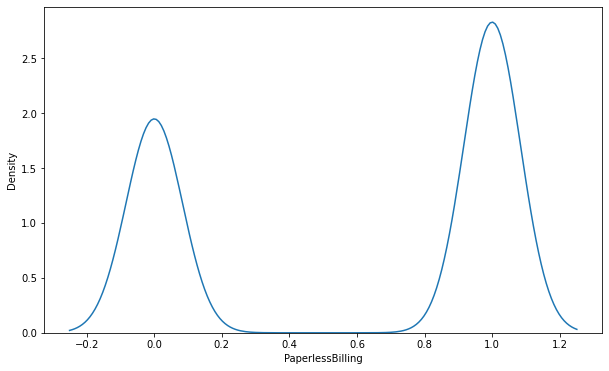

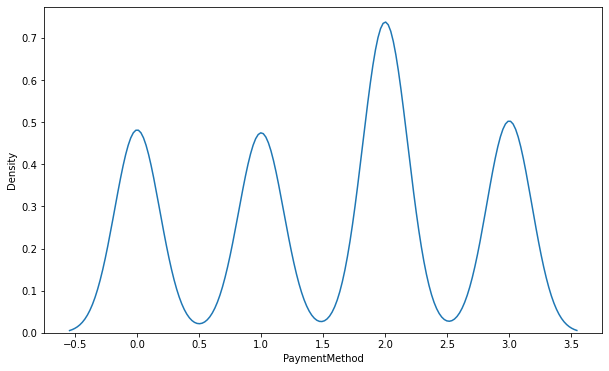

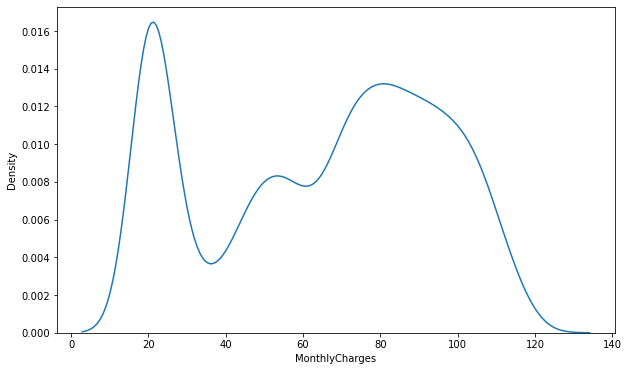

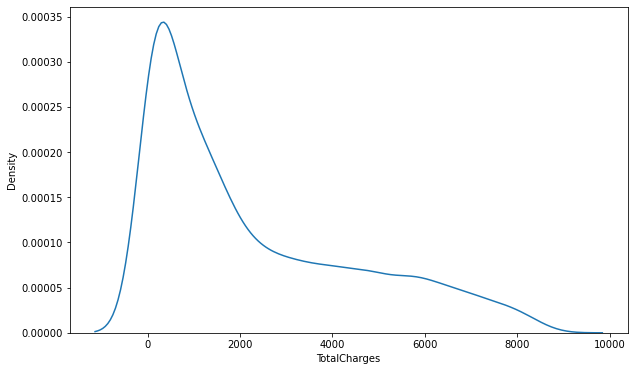

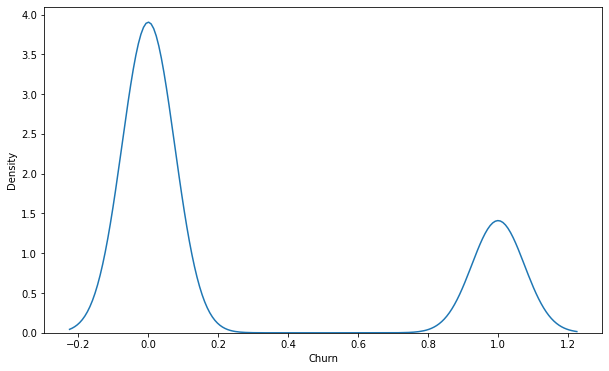

In [53]:
for i in df.columns:
    plt.figure(figsize=[10,6])
    sns.kdeplot(df[i])

In [54]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.963275
Churn               1.063031
dtype: float64

There is not much skewness present in the data.

In [55]:
x= df.drop(columns='Churn')
y= df['Churn']
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [56]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

### Scaling

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledX = scaler.fit_transform(x)

## 5.train test split

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [59]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=101)

### Finding best Random State

In [60]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
d=5
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    DTC.fit(x_train,y_train)
    pred_train=DTC.predict(x_train)
    pred_test = DTC.predict(x_test)
    a=r2_score(y_train,pred_train)
    b=r2_score(y_test,pred_test)
    c=a-b
    print(i,c)
    if d>=c:
        d=c
        print("least value",i,d)

0 1.3922838441598915
least value 0 1.3922838441598915
1 1.4402001781027307
2 1.3706103192031582
least value 2 1.3706103192031582
3 1.4299243894900449
4 1.458715560541557
5 1.4234300783636091
6 1.4577718794905485
7 1.266797693037244
least value 7 1.266797693037244
8 1.4264913665905818
9 1.3498253071266109
10 1.433393263725012
11 1.2716225329569744
12 1.3880051082503724
13 1.3848341499276364
14 1.4488603635434056
15 1.3422769073242704
16 1.389692044878398
17 1.3714493057330168
18 1.3693600995691964
19 1.3944330923334523
20 1.4172303469007481
21 1.4987573664980083
22 1.446971115684134
23 1.338378929834291
24 1.3542929275467266
25 1.294269628052482
26 1.3585506814865687
27 1.4035059626080968
28 1.366776518460001
29 1.3295092490570481
30 1.2739056805957578
31 1.408079569695425
32 1.3832720722850795
33 1.389253445979746
34 1.3627708367750677
35 1.3600204714384474
36 1.2694123089615306
37 1.340338924535597
38 1.2319333681434457
least value 38 1.2319333681434457
39 1.3868264537884007
40 1.4880

In [61]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=38)

## 6.Model Construction

## 1.RandomForestClassifier

In [62]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
model_rfc = RandomForestClassifier(n_estimators = 200)

# feeding the training set into the model
model_rfc.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_rfc.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_rfc.score(x_train, y_train))
print("Testing accuracy :", model_rfc.score(x_test, y_test))

Training accuracy : 0.9983772819472616
Testing accuracy : 0.7856128726928537


In [63]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1512
           1       0.67      0.48      0.56       601

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.77      0.79      0.77      2113

[[1369  143]
 [ 310  291]]


#### cross validation

In [64]:
#Now lets try to do some evaluation for random forest model using cross validation.
from sklearn.model_selection import GridSearchCV, cross_val_score
rfc_cv = cross_val_score(estimator = model_rfc, X = x_train, y = y_train, cv = 5)
rfc_cv.mean()

0.7890466531440162

### 2.LogisticRegression

In [65]:
from sklearn.linear_model import LogisticRegression
# creating the model
model_lg = LogisticRegression()

# feeding the training set into the model
model_lg.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_lg.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_lg.score(x_train, y_train))
print("Testing accuracy :", model_lg.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.8091277890466532
Testing accuracy : 0.8045433033601515
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1512
           1       0.71      0.53      0.61       601

    accuracy                           0.80      2113
   macro avg       0.77      0.72      0.74      2113
weighted avg       0.80      0.80      0.80      2113

[[1379  133]
 [ 280  321]]


#### cross validation

In [66]:
from sklearn.model_selection import GridSearchCV, cross_val_score
lg_cv=cross_val_score(model_lg,x,y,scoring='accuracy', cv = 3).mean()
lg_cv

0.80647482849903

### 3.SVC

In [67]:
from sklearn.svm import SVC

# creating the model
model_svc = SVC()

# feeding the training set into the model
model_svc.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_svc.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_svc.score(x_train, y_train))
print("Testing accuracy :", model_svc.score(x_test, y_test))

Training accuracy : 0.8241379310344827
Testing accuracy : 0.7917652626597255


In [68]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1512
           1       0.70      0.46      0.56       601

    accuracy                           0.79      2113
   macro avg       0.76      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113

[[1396  116]
 [ 324  277]]


### cross validation

In [69]:
svc_cv = cross_val_score(estimator = model_svc, X = x_train, y = y_train, cv = 10)
svc_cv.mean()

0.7991886409736308

### 4.DecisionTreeClassifier

In [70]:
from sklearn.tree import DecisionTreeClassifier

# creating model
model_dt = DecisionTreeClassifier()

# feeding the training set into the model
model_dt.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_dt.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_dt.score(x_train, y_train))
print("Testing accuracy :", model_dt.score(x_test, y_test))

Training accuracy : 0.9983772819472616
Testing accuracy : 0.7264552768575485


In [71]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1512
           1       0.52      0.48      0.50       601

    accuracy                           0.73      2113
   macro avg       0.66      0.65      0.66      2113
weighted avg       0.72      0.73      0.72      2113

[[1245  267]
 [ 311  290]]


#### cross validation

In [72]:
#Now lets try to do some evaluation for decision tree model using cross validation.

dt_cv = cross_val_score(estimator = model_dt, X = x_train, y = y_train, cv = 10)
dt_cv.mean()

0.7348884381338743

### 5.GaussianNB

In [73]:
from sklearn.naive_bayes import GaussianNB
# creating model
model_gnb = GaussianNB()

# feeding the training set into the model
model_gnb.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_gnb.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_gnb.score(x_train, y_train))
print("Testing accuracy :", model_gnb.score(x_test, y_test))
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))
print('accuracy_score :' ,accuracy_score(y_test,y_pred))

Training accuracy : 0.7553752535496957
Testing accuracy : 0.767628963558921
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1512
           1       0.57      0.72      0.64       601

    accuracy                           0.77      2113
   macro avg       0.72      0.75      0.73      2113
weighted avg       0.79      0.77      0.77      2113

[[1187  325]
 [ 166  435]]
accuracy_score : 0.767628963558921


#### C-V Score

In [74]:
#Now lets try to do some evaluation for GaussianNB model using cross validation.
gnb_cv = cross_val_score(estimator = model_gnb, X = x_train, y = y_train, cv = 10)
gnb_cv.mean()

0.7549695740365111

### 6.KNeighborsClassifier

In [75]:
from sklearn.neighbors import KNeighborsClassifier
# creating model
model_KNc = KNeighborsClassifier(n_neighbors=7)

# feeding the training set into the model
model_KNc.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_KNc.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_KNc.score(x_train, y_train))
print("Testing accuracy :", model_KNc.score(x_test, y_test))
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))
print('accuracy_score :' ,accuracy_score(y_test,y_pred))

Training accuracy : 0.8217038539553753
Testing accuracy : 0.7718883104590629
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1512
           1       0.62      0.50      0.56       601

    accuracy                           0.77      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.76      0.77      0.76      2113

[[1329  183]
 [ 299  302]]
accuracy_score : 0.7718883104590629


#### c-v score

In [76]:
knn_cv=cross_val_score(model_KNc,x,y,scoring='accuracy', cv = 10)
knn_cv.mean()

0.7689891602192133

In [77]:
print('MODEL',"             ",'Accurancy score','      ','C_V Score','     ','Difference')
print("LOGISTIC REGG    ",model_lg.score(x_test, y_test),"      ",round(lg_cv.mean(),2),"      ", round(model_lg.score(x_test, y_test)-lg_cv.mean(),3))
print("RANDOM FOREST    ",model_rfc.score(x_test, y_test),"      ",round(rfc_cv.mean(),2),"     ", round(model_rfc.score(x_test, y_test)-rfc_cv.mean(),3))
print("SVC              ",model_svc.score(x_test, y_test),"      ",round(svc_cv.mean(),2),"      ", round(model_svc.score(x_test, y_test)-svc_cv.mean(),3))
print("DTREE            ",model_rfc.score(x_test, y_test),"      ",round(dt_cv.mean(),2),"     ", round(model_dt.score(x_test, y_test)-dt_cv.mean(),3))
print('KNeighborsclass  ',model_KNc.score(x_test, y_test),"      ",round(knn_cv.mean(),2),"      ",round(model_KNc.score(x_test, y_test)-knn_cv.mean(),3)) 
print('GaussianNB',"      ",model_gnb.score(x_test, y_test),"      ",round(gnb_cv.mean(),2),"     ",round(model_gnb.score(x_test, y_test)-gnb_cv.mean(),3))

MODEL               Accurancy score        C_V Score       Difference
LOGISTIC REGG     0.8045433033601515        0.81        -0.002
RANDOM FOREST     0.7856128726928537        0.79       -0.003
SVC               0.7917652626597255        0.8        -0.007
DTREE             0.7856128726928537        0.73       -0.008
KNeighborsclass   0.7718883104590629        0.77        0.003
GaussianNB        0.767628963558921        0.75       0.013


The best model accoding to accuracy score- cross validation score is RandomForestClassifier,DecisionTreeClassifie since it is having least difference

## 7.Hyper parameter tuning

## RandomForestClassifier

In [78]:
#With Hyper Parameters Tuning
#2-2,Randomforest
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#making the instance
model=RandomForestClassifier()
#hyper parameters set
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#learning
model1.fit(x_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(x_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))
rf_final=prediction
rf_finalmod=model1

Best Hyper Parameters:
 {'criterion': 'gini', 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 30, 'n_jobs': -1, 'random_state': 123}
Accuracy: 0.7865593942262187
Confusion Metrix:
 [[1371  310]
 [ 141  291]]


In [79]:
clf= RandomForestClassifier(criterion= 'entropy',min_samples_leaf= 3,random_state= 123,n_jobs= -1)
clf.fit(x_train, y_train)
predRFC= clf.predict(x_test)
randomforest_accu=accuracy_score(y_test,predRFC)
randomforest_accu
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))
print(randomforest_accu)

[[1379  133]
 [ 305  296]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1512
           1       0.69      0.49      0.57       601

    accuracy                           0.79      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.78      0.79      0.78      2113

0.7927117841930904


In [80]:
randomforest_cv= cross_val_score(clf,x,y,scoring='accuracy', cv = 3).mean()
randomforest_cv

0.8006532437049775

## 2. DecisionTreeClassifier

In [81]:
from sklearn.model_selection import GridSearchCV
parameter ={ 'max_depth': np.arange(2,10),'criterion':['gini','entropy'],'splitter':['best', 'random']}

In [82]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [83]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'splitter': ['best', 'random']})

In [84]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}

In [85]:
parameters_DT = {'max_depth': [6,7,8,9,10],
'min_samples_leaf': [2,3,4,5,6,7],
'min_samples_split': [2,3,4,5,6,7]}

In [86]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters_DT,cv=5)

In [87]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]})

In [88]:
GCV.best_params_

{'max_depth': 7, 'min_samples_leaf': 6, 'min_samples_split': 5}

In [89]:
final_mod=DecisionTreeClassifier(criterion='gini',splitter= 'best',max_depth=10,min_samples_leaf= 2, min_samples_split= 3)
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.7643161381921438


### cross validation score

In [90]:
from sklearn.model_selection import cross_val_score
dtc_cv=cross_val_score(final_mod,x,y,scoring='accuracy', cv = 10).mean()
dtc_cv

0.7704128384912959

The best model is Random Forest Classifier with 80% accuracy.

# 8.Evaluation

### AUC-ROC curve

In [91]:
# train model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# RandomForestClassifier
model1 = RandomForestClassifier()
# DecisionTreeClassifier
model2 = DecisionTreeClassifier()

# fit model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)

In [92]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [93]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.8286145665513387 0.6554683992287986


#### The best model is Random Forest Classifier.

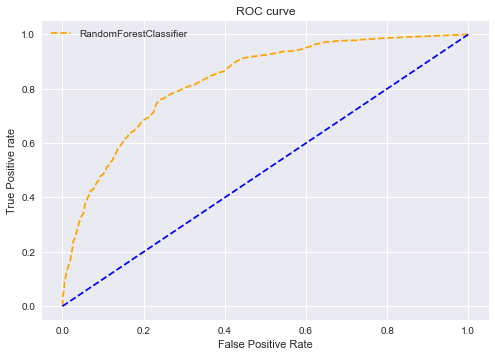

In [94]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='RandomForestClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### 9.Saving The Model

In [95]:
import joblib
joblib.dump(predRFC,"final model.pkl")

['final model.pkl']